In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv("CC GENERAL.csv")



In [8]:
# Drop the irrelevant columns
df.drop(['CUST_ID', 'TENURE'], axis=1, inplace=True)

# Fill the missing values with the column mean
df.fillna(df.mean(), inplace=True)


In [9]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [5]:
# Apply PCA
pca = PCA(n_components=10)
pca.fit(df_scaled)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Get the cumulative sum of explained variance
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Print the explained variance ratios and the cumulative sum
print(explained_variance_ratio)
print(cumulative_explained_variance_ratio)


[0.28845814 0.21570572 0.09330079 0.07548528 0.06652726 0.05389941
 0.04544392 0.04156174 0.03280202 0.02534919]
[0.28845814 0.50416386 0.59746464 0.67294993 0.73947718 0.7933766
 0.83882052 0.88038226 0.91318428 0.93853347]


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Apply k-means for k=2 to 10 and get the silhouette scores
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    score = silhouette_score(pca_result, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"k={k}, silhouette score={score}")


k=2, silhouette score=0.4673691385370267
k=3, silhouette score=0.4533202455994723
k=4, silhouette score=0.40965604922808085
k=5, silhouette score=0.4027907224885842
k=6, silhouette score=0.388262231674759
k=7, silhouette score=0.38315258713390743
k=8, silhouette score=0.39453384479864817
k=9, silhouette score=0.3745387362598814
k=10, silhouette score=0.36766161003591685


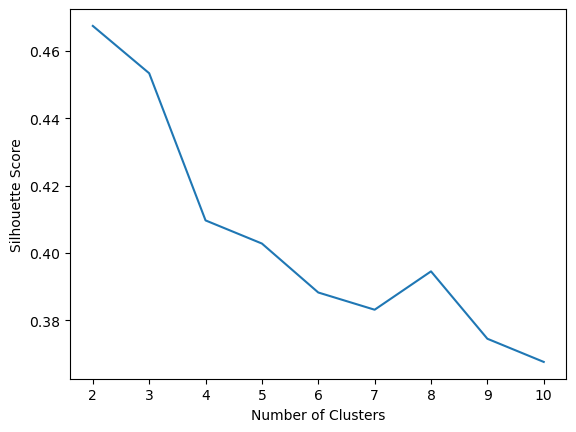

In [11]:
import matplotlib.pyplot as plt

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv("CC GENERAL.csv")


In [18]:
# Drop the irrelevant columns
df.drop(['CUST_ID', 'TENURE'], axis=1, inplace=True)

# Fill the missing values with the column mean
df.fillna(df.mean(), inplace=True)


In [19]:
# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [20]:
# Perform PCA
pca = PCA(n_components=10)
df_pca = pca.fit_transform(df_scaled)


In [23]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_pca)
labels = kmeans.labels_


In [24]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(df_pca, labels)
print(f"The average silhouette score is : {silhouette_avg}")


The average silhouette score is : 0.23147252206108707


In [26]:
import pandas as pd

df = pd.read_csv('pd_speech_features.csv', header=1)


In [27]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


Accuracy: 0.8013245033112583


In [33]:
import pandas as pd

df = pd.read_csv("Iris.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)


In [ ]:
PCA (Principal Component Analysis) and LDA (Linear Discriminant Analysis) are both methods for dimensionality reduction, but they have different objectives and are used in different scenarios.

PCA is an unsupervised method that seeks to find the most important features or directions in the data that capture the maximum amount of variance. It does not take into account the labels of the data and simply tries to find a low-dimensional representation of the data that preserves as much information as possible. PCA is often used for data visualization, noise reduction, and feature extraction.

LDA, on the other hand, is a supervised method that seeks to find the most discriminative features or directions in the data that maximize the separation between the classes. It takes into account the labels of the data and tries to find a low-dimensional representation of the data that maximizes the inter-class distance and minimizes the intra-class distance. LDA is often used for classification and feature extraction.

In summary, while both PCA and LDA are methods for dimensionality reduction, PCA is an unsupervised method that seeks to capture the maximum amount of variance in the data, while LDA is a supervised method that seeks to maximize the separation between the classes in the data.